In [1]:
from PIL import Image

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import gym
from gym.utils import play

In [5]:
from rl.core import Processor
from rl.memory import SequentialMemory

In [6]:
env = gym.make("Breakout-v0")

C:\Users\pc\anaconda3\envs\my_rl_env\lib\site-packages\gym\envs\registration.py:565: UserWarning: WARN: The environment Breakout-v0 is out of date. You should consider upgrading to version `v4`.
  f"The environment {id} is out of date. You should consider "
C:\Users\pc\anaconda3\envs\my_rl_env\lib\site-packages\gym\utils\passive_env_checker.py:98: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  "We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) "


In [8]:
WINDOWS_LENGTH = 3

In [9]:
from collections import deque

In [16]:
np.random.seed(42)
env.reset()

sequential_frame_buffer = []
temp_sequential_frames = deque(maxlen=WINDOWS_LENGTH)

for i in range(10):
    
    if i ==1:
        action =1 #lancer la balle
    else:
        action = 3 
    
    observation, reward, done, info = env.step(action)
    
    if len(temp_sequential_frames)==WINDOWS_LENGTH:
        #quand on a 3 frames, on l'intègre dans notre buffer
        sequential_frame_buffer.append(list(temp_sequential_frames))
        
    temp_sequential_frames.append(observation)

In [17]:
len(sequential_frame_buffer)

7

In [19]:
plt.imshow(sequential_frame_buffer[0][0])

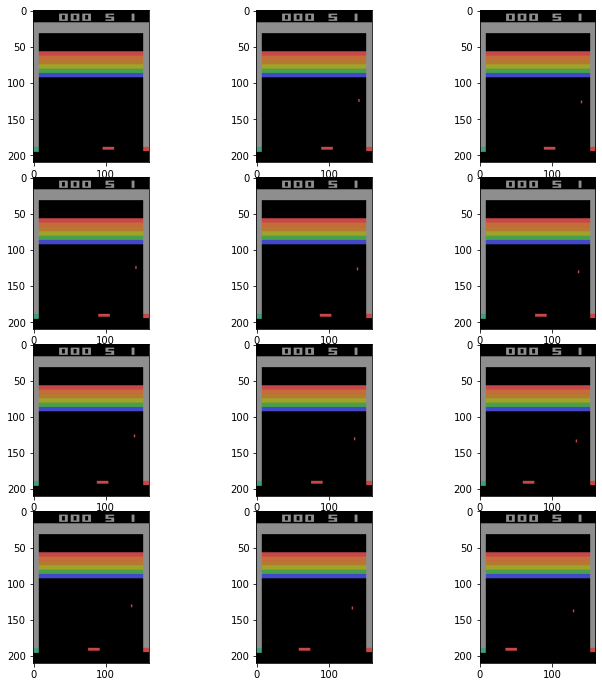

In [20]:
%matplotlib inline

fig, axis = plt.subplots(4, WINDOWS_LENGTH, figsize = (12,12))

for global_index, timestep in enumerate(sequential_frame_buffer[:4]):
    for frame_index, frame in enumerate(timestep):
        axis[global_index][frame_index].imshow(frame)
        
fig.subplots_adjust(wspace=0, hspace = 0.1)

In [21]:
 memory = SequentialMemory(limit = 1000, window_length=WINDOWS_LENGTH) # limit = le nombre d'experience

In [22]:
from PIL import Image
from rl.core import Processor

In [23]:
IMG_SHAPE = (84,84) #(210,160,3) la shape du sequential frame buffer, on va modifier la shape pour le temps de calcul

In [24]:
class BreakOutProcessor(Processor):
    
    def process_observation(self, observation):
        
        img = Image.fromarray(observation) # array --> Image avec PIL
        img = img.resize(IMG_SHAPE)
        img = img.convert('L') #grayscale (ou Luminescence)
        
        return np.array(img)

In [25]:
sample_images = []
breakout_proc = BreakOutProcessor()
env.reset()

for _ in range(200):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    processed_observation = breakout_proc.process_observation(observation)
    sample_images.append(processed_observation)

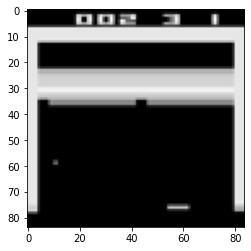

In [28]:
plt.imshow(sample_images[-1], cmap = 'gray')